# Phase 2 Results Analysis

In [28]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from Test_Functions import plotsteps,plotreward
import pandas as pd
%matplotlib inline

In [29]:
experiements = pd.read_csv('Final.csv')
experiements = experiements.sort_values('experiment')

## episode vs step
* The text above each two plots represent :
    * Experiment ID (1, 2 .....)
    * advantage (naive , avg , max)
    * activation ( relu , tanh)
    * seed (1337 , 4917)
* Used colors in the plots
    * <b>blue</b> the line color
    * <b>Green</b> part is done in exploration
    * <b>Yellow</b> part is done without exploration

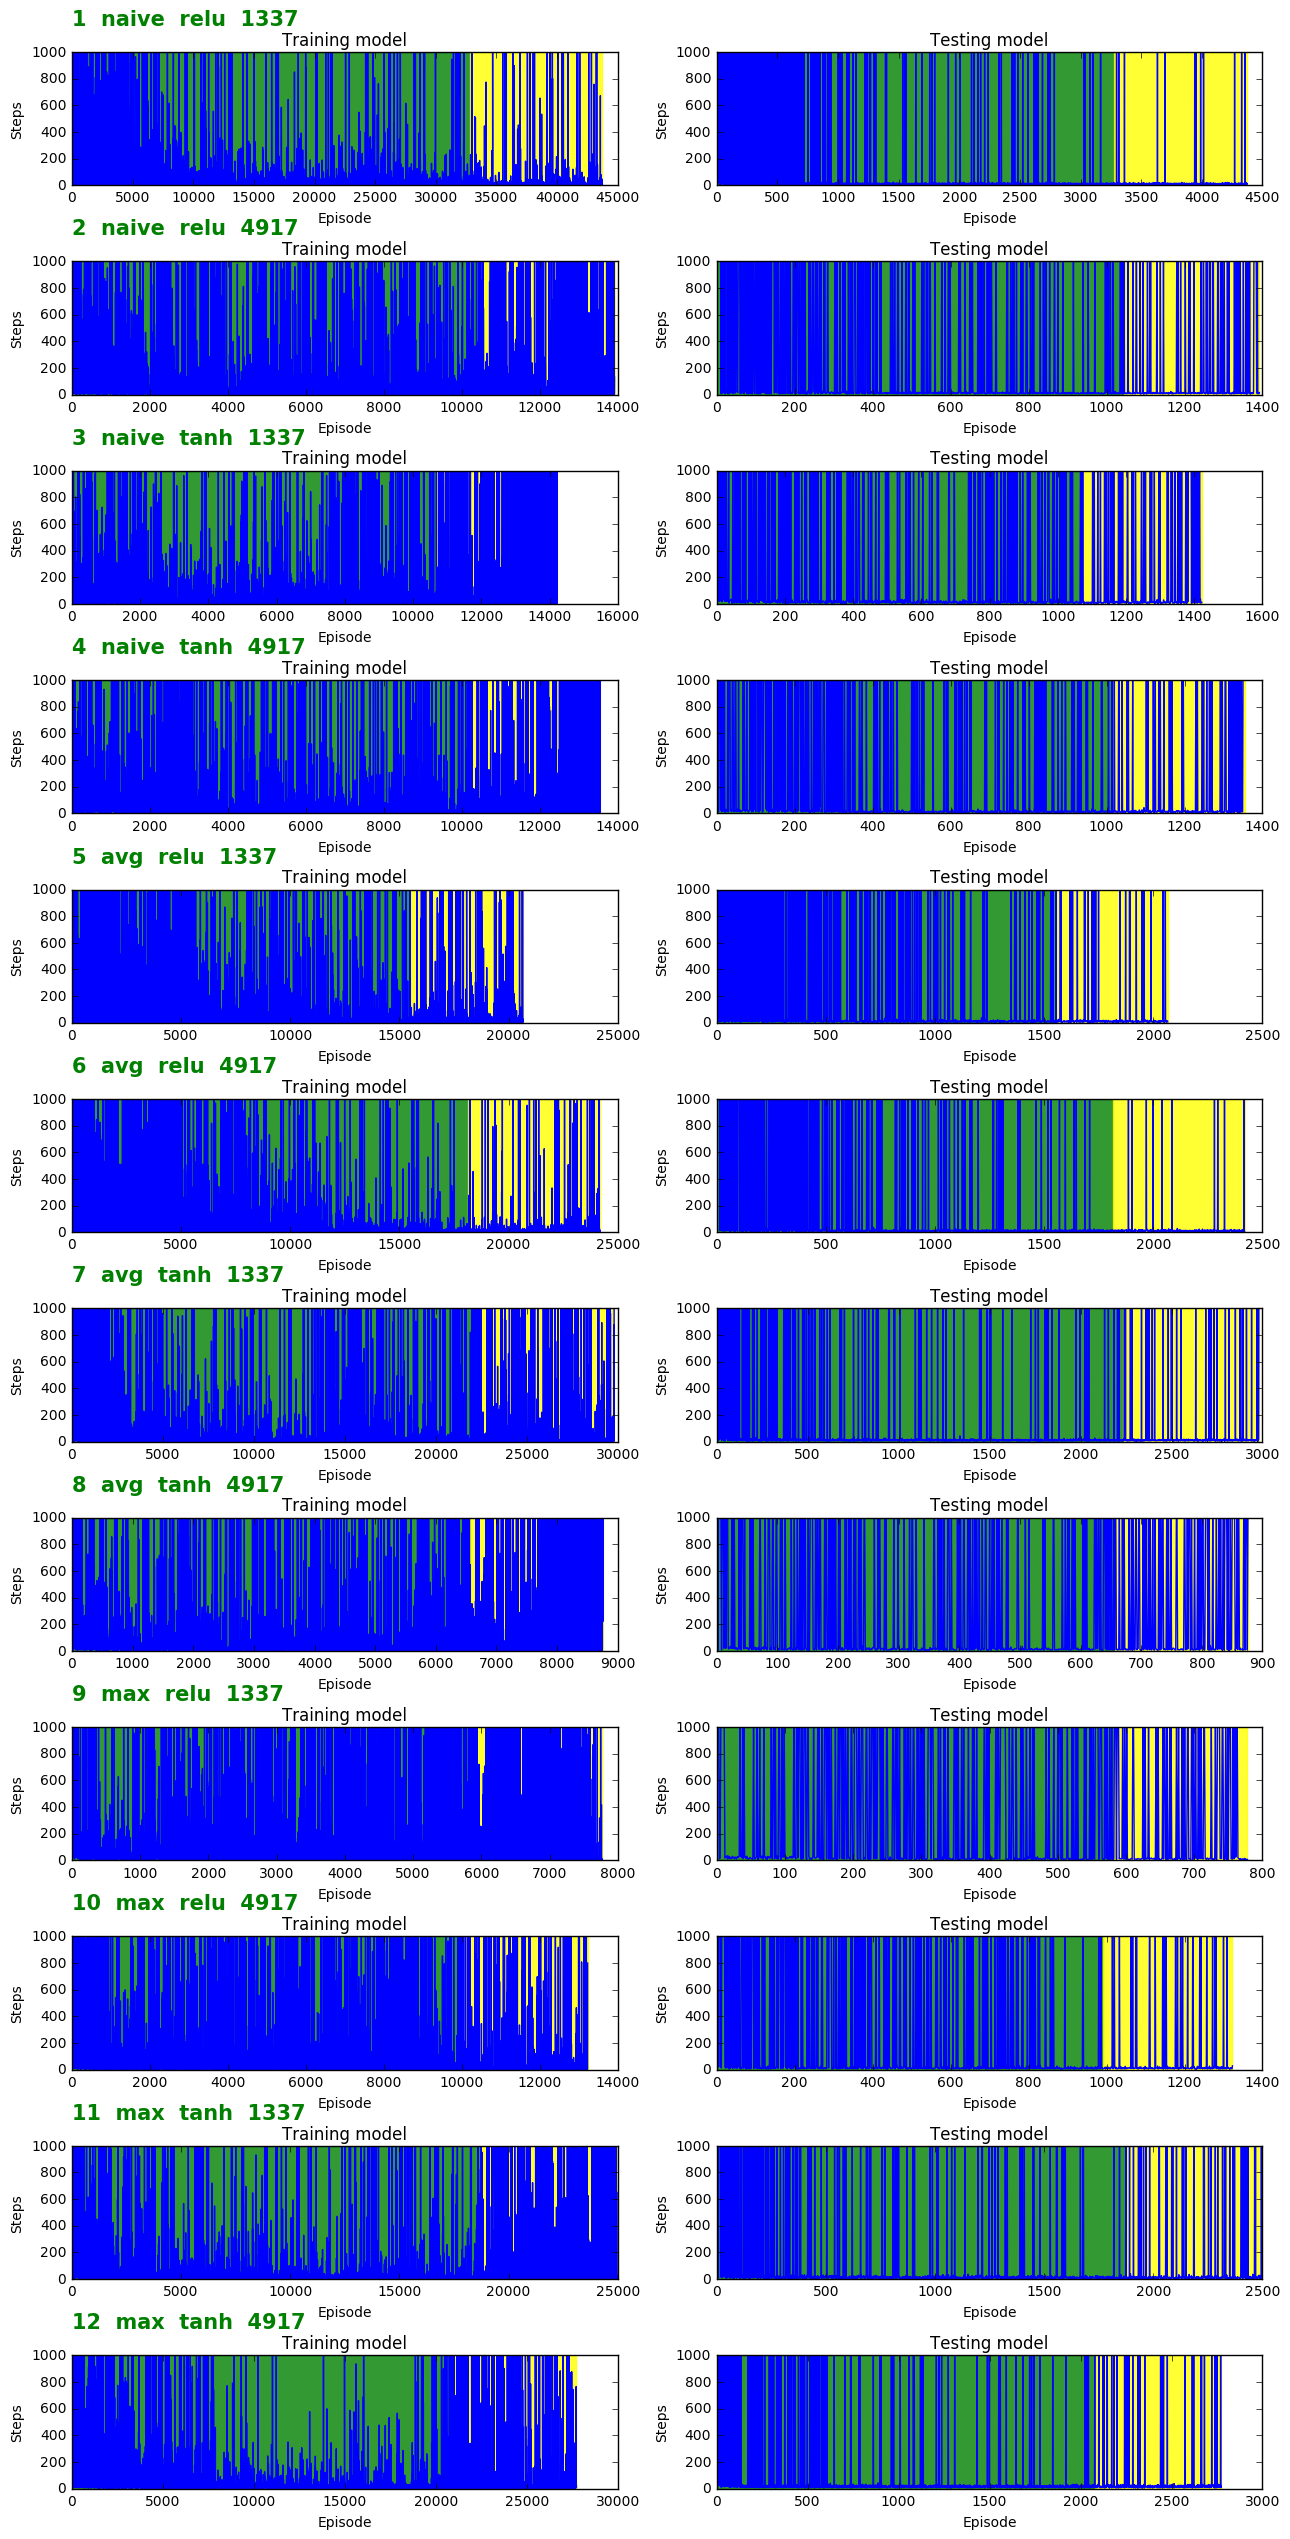

In [3]:
x = experiements.experiment.max()*2
y = 2
z=0
plt.figure(figsize=(13,50))
for i in experiements.experiment.as_matrix():
    txt = experiements[experiements.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=experiements.columns[[0,5,7,16]],\
                                                         header=False,index=False)
    plotsteps(i,x,y,z,txt,vanish)
    z+=2
plt.tight_layout()
    

## episode vs reward

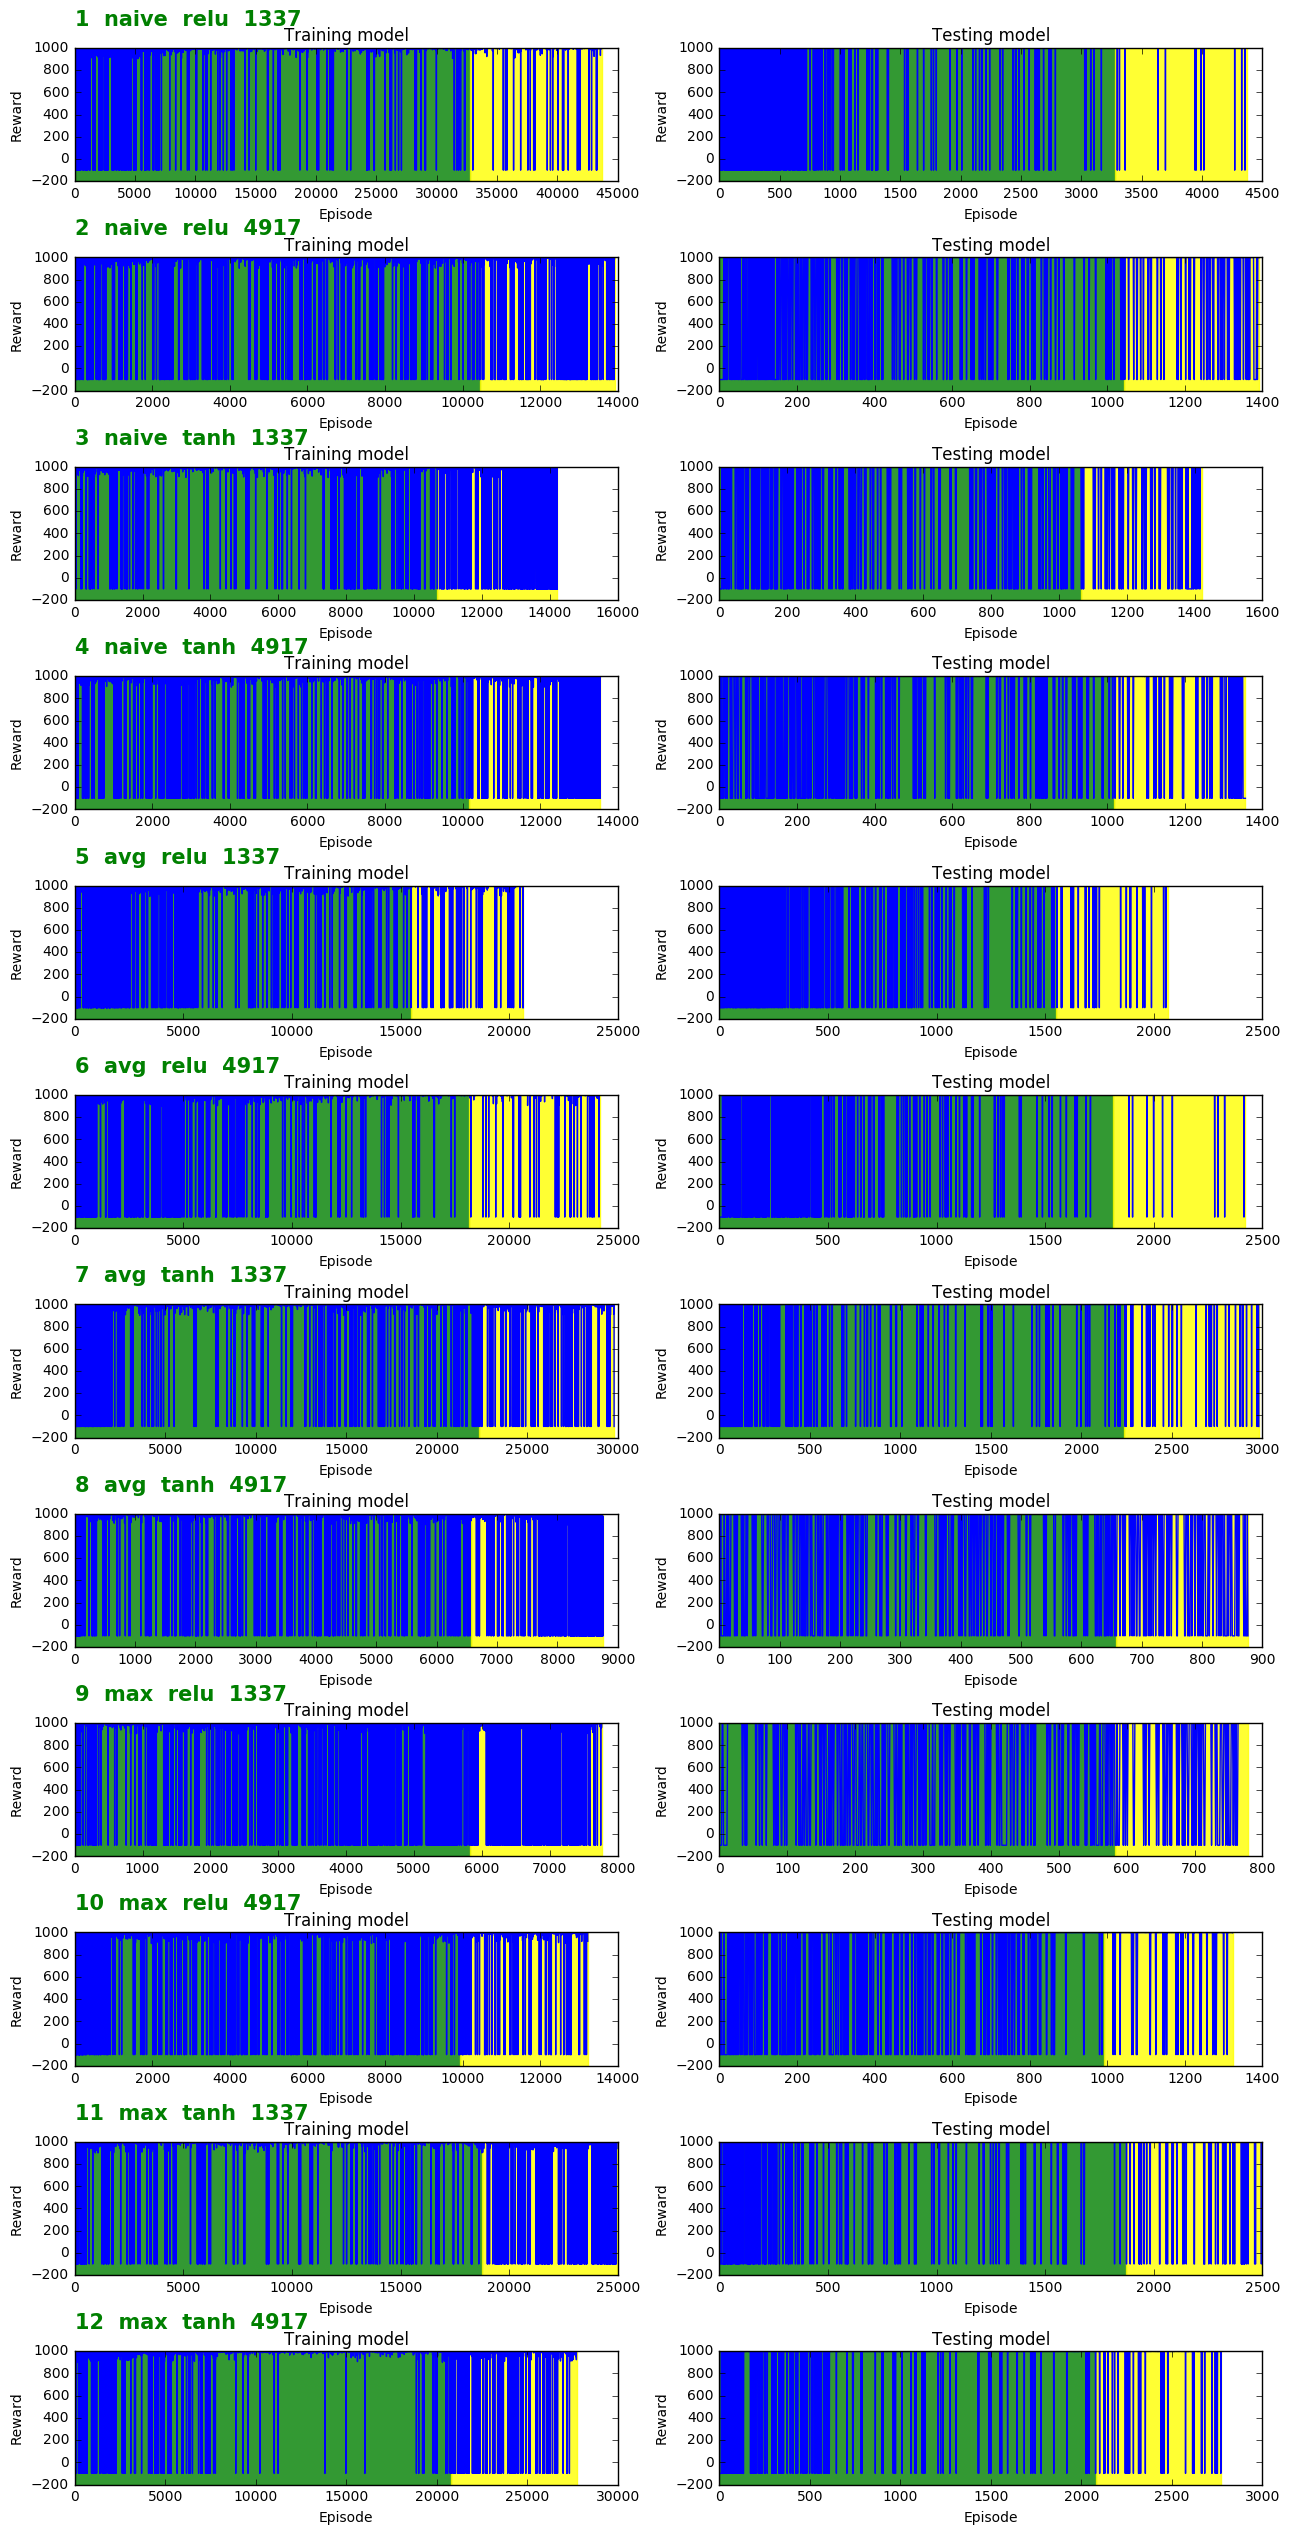

In [4]:
x = experiements.experiment.max()*2
y = 2
z=0
plt.figure(figsize=(13,50))
for i in experiements.experiment.as_matrix():
    txt = experiements[experiements.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=experiements.columns[[0,5,7,16]],\
                                                         header=False,index=False)
    plotreward(i,x,y,z,txt,vanish)
    z+=2
plt.tight_layout()

## Correlation between Training And testing

In [32]:
experiements['tr_AR'] = experiements['tr_TR']/experiements['tr_count']
experiements['tr_AS'] = experiements['tr_TS']/experiements['tr_count']
experiements['ts_AR'] = experiements['ts_TR']/experiements['ts_count']
experiements['ts_AS'] = experiements['ts_TS']/experiements['ts_count']

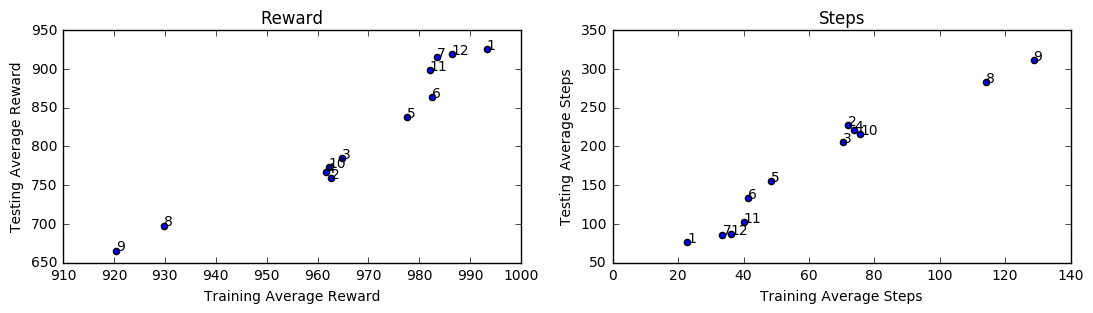

In [6]:
plt.figure(figsize=(13,3))
tt = experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']]
ax = plt.subplot(1,2,1)
ax.scatter(experiements.tr_AR,experiements.ts_AR)
ax.set_title('Reward')
ax.set_xlabel('Training Average Reward')
ax.set_ylabel('Testing Average Reward')

for i in range(tt.shape[0]):
    ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AR'],tt.iloc[i]['ts_AR']))
ax = plt.subplot(1,2,2)
ax.scatter(experiements.tr_AS,experiements.ts_AS)
ax.set_title('Steps')
ax.set_xlabel('Training Average Steps')
ax.set_ylabel('Testing Average Steps')
for i in range(tt.shape[0]):
    ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AS'],tt.iloc[i]['ts_AS']))

## Best Average Training Reward
* Each row represent the an experiement that contain at least 10K episode.

In [36]:
experiements.sort_values('tr_AR',ascending=False)

,experiment,reply_size,layers,tau,optimizer,advantage,max_steps,activation,batch_size,totalsteps,...,tr_TT,tr_TS,ts_count,ts_TR,ts_TT,ts_TS,tr_AR,tr_AS,ts_AR,ts_AS
0,1,100000,1,0.001,adam,naive,1000,relu,10,1000000,...,6137,1000000,4373,4048794,1642,332053,993.207703,22.869689,925.861880,75.932541
11,12,100000,1,0.001,adam,max,1000,tanh,10,1000000,...,4507,1000005,2773,2548053,948,239464,986.330977,36.066109,918.879553,86.355572
6,7,100000,1,0.001,adam,avg,1000,tanh,10,1000000,...,5184,1000504,2980,2726353,1283,256466,983.420551,33.575086,914.883557,86.062416
5,6,100000,1,0.001,adam,avg,1000,relu,10,1000000,...,6580,1000005,2418,2086806,1574,321938,982.585274,41.365253,863.029777,133.142266
10,11,100000,1,0.001,adam,max,1000,tanh,10,1000000,...,4557,1000018,2499,2245437,1009,255623,982.066290,40.031144,898.534214,102.290116
4,5,100000,1,0.001,adam,avg,1000,relu,10,1000000,...,5901,1000411,2066,1730827,1562,321727,977.531497,48.439016,837.767183,155.724589
2,3,100000,1,0.001,adam,naive,1000,tanh,10,1000000,...,5244,1000147,1422,1115759,1418,292401,964.834728,70.338772,784.640647,205.626582
1,2,100000,1,0.001,adam,naive,1000,relu,10,1000000,...,6372,1000010,1392,1056377,1506,316222,962.563699,71.855285,758.891523,227.170977
9,10,100000,1,0.001,adam,max,1000,relu,10,1000000,...,5803,1000551,1323,1022497,1095,285022,962.194300,75.644591,772.862434,215.436130
3,4,100000,1,0.001,adam,naive,1000,tanh,10,1000000,...,5193,1000128,1356,1039989,1430,300105,961.625489,73.804738,766.953540,221.316372


## Best Average Testing Reward
* Each row represent the an experiement that contain at least 10K episode.

In [9]:
experiements.sort_values('ts_AR',ascending=False)

,experiment,reply_size,layers,tau,optimizer,advantage,max_steps,activation,batch_size,totalsteps,...,tr_TT,tr_TS,ts_count,ts_TR,ts_TT,ts_TS,tr_AR,tr_AS,ts_AR,ts_AS
0,1,100000,1,0.001,adam,naive,1000,relu,10,1000000,...,6137,1000000,4373,4048794,1642,332053,993.207703,22.869689,925.861880,75.932541
11,12,100000,1,0.001,adam,max,1000,tanh,10,1000000,...,4507,1000005,2773,2548053,948,239464,986.330977,36.066109,918.879553,86.355572
6,7,100000,1,0.001,adam,avg,1000,tanh,10,1000000,...,5184,1000504,2980,2726353,1283,256466,983.420551,33.575086,914.883557,86.062416
10,11,100000,1,0.001,adam,max,1000,tanh,10,1000000,...,4557,1000018,2499,2245437,1009,255623,982.066290,40.031144,898.534214,102.290116
5,6,100000,1,0.001,adam,avg,1000,relu,10,1000000,...,6580,1000005,2418,2086806,1574,321938,982.585274,41.365253,863.029777,133.142266
4,5,100000,1,0.001,adam,avg,1000,relu,10,1000000,...,5901,1000411,2066,1730827,1562,321727,977.531497,48.439016,837.767183,155.724589
2,3,100000,1,0.001,adam,naive,1000,tanh,10,1000000,...,5244,1000147,1422,1115759,1418,292401,964.834728,70.338772,784.640647,205.626582
9,10,100000,1,0.001,adam,max,1000,relu,10,1000000,...,5803,1000551,1323,1022497,1095,285022,962.194300,75.644591,772.862434,215.436130
3,4,100000,1,0.001,adam,naive,1000,tanh,10,1000000,...,5193,1000128,1356,1039989,1430,300105,961.625489,73.804738,766.953540,221.316372
1,2,100000,1,0.001,adam,naive,1000,relu,10,1000000,...,6372,1000010,1392,1056377,1506,316222,962.563699,71.855285,758.891523,227.170977


## Average Results over multiple seeds

In [16]:
i = 1
while i<13:
    #seed 1337
    #tmp = experiements[experiements.experiment==i][experiements.columns[20:]].as_matrix()
    #seed 4917
    #tmp = experiements[experiements.experiment==i+1][experiements.columns[20:]].as_matrix() 
    # both seeds
    tmp += experiements[experiements.experiment==i+1][experiements.columns[20:]].as_matrix()
    print(experiements[experiements.experiment==i][experiements.columns[[5,7]]].as_matrix())
    print('Average Training/Testing Reward:{}==={}'.format(tmp[0][1]/tmp[0][0] , tmp[0][5]/tmp[0][4]))
    print('Average Training/Testing Time  :{}==={}'.format(tmp[0][2]/tmp[0][0],tmp[0][6]/tmp[0][4]))
    print('Average Training/Testing Steps :{}==={}'.format(tmp[0][3]/tmp[0][0],tmp[0][7]/tmp[0][4]))
    i+=2

[['naive' 'relu']]
Average Training/Testing Reward:972.0206273039051===831.615368165942
Average Training/Testing Time  :0.31820093974374514===0.7307719723430037
Average Training/Testing Steps :57.05001746868115===162.70817592130587
[['naive' 'tanh']]
Average Training/Testing Reward:971.1047450618328===825.9162170945726
Average Training/Testing Time  :0.32392946775724635===0.7593110172245694
Average Training/Testing Steps :58.52622202572138===167.8737731556711
[['avg' 'relu']]
Average Training/Testing Reward:972.6641700893936===830.9569735437848
Average Training/Testing Time  :0.316900498379004===0.7445936078189069
Average Training/Testing Steps :56.19521061710221===163.1565466494411
[['avg' 'tanh']]
Average Training/Testing Reward:970.6575217021094===824.7081214197763
Average Training/Testing Time  :0.33012375959257334===0.7730606563520531
Average Training/Testing Steps :58.91861642023638===168.7838214037154
[['max' 'relu']]
Average Training/Testing Reward:970.0976945389078===821.27887

# Full parameters Analysis

In [17]:
import pandas as pd
#from sklearn.preprocessing import LabelEncoder
from Test_Functions import plotdata
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
experiements = pd.read_csv('Final.csv')

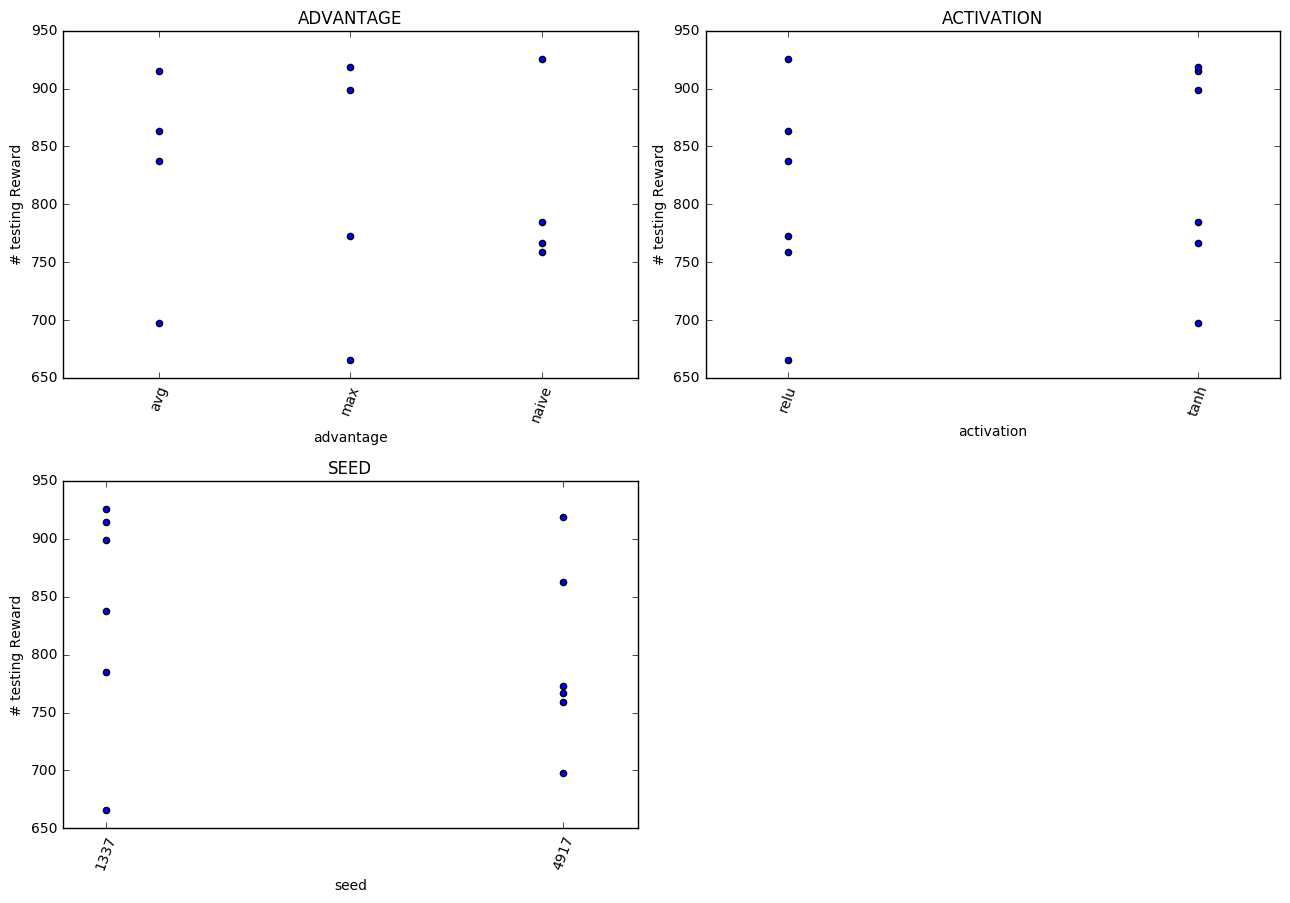

In [26]:
features = experiements.columns[[5,7,16]]
counter =1
plt.figure(figsize=(13,40))
for i in features:
    ax = plt.subplot(9,2,counter)
    counter+=1
    plotdata(ax,i,experiements['ts_TR']/experiements['ts_count'],'# testing Reward',experiements)
plt.tight_layout()